# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets, ndimage
from scipy.fft import dctn, idctn
import cv2 as cv

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

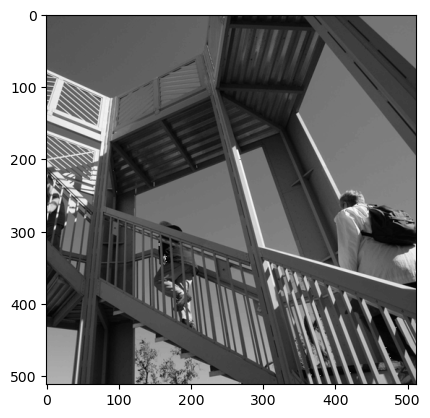

In [2]:
X = datasets.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

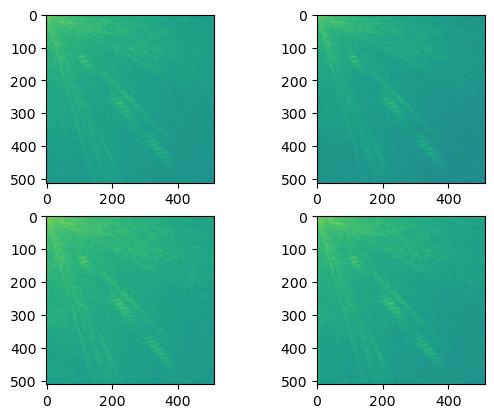

In [3]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

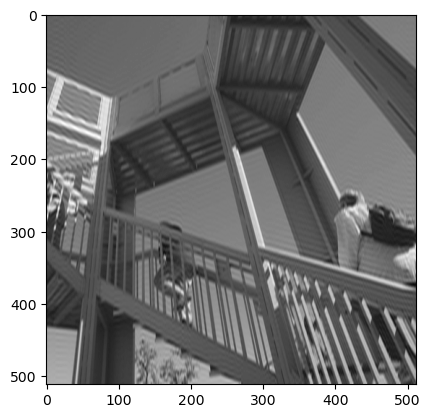

In [4]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

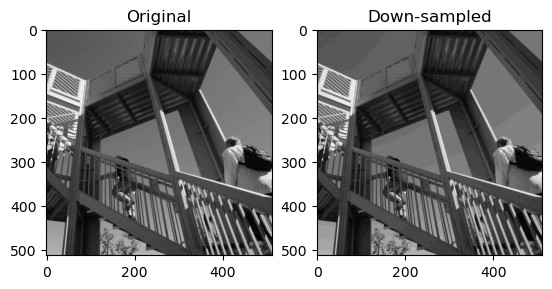

In [5]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

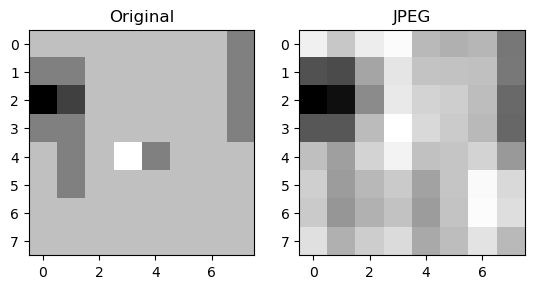

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [6]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

Clasa <strong>JpegEncoder</strong> parcurge pasii compresiei Jpeg conform specificatiei:
<ul>
    <li>In cazul unei imagini RGB, realizeaza conversia catre Y'CbCr</li>
    <li>Proceseaza toate blocurile de 8*8 pixeli:
    <ol>
    <li>Transformare 2D-DCT</li>
    <li>Cuantizare</li>
    <li>Eliminarea frecventele inalte - configurabil; compresia va deveni mai buna, dar pierdem calitate la reconstructie</li>
    <li>Parcurgere in Zig-Zag</li>
    <li>Aducere la forma "intermediate symbol sequence": deoarece parcurgerea Zig-Zag este rara, o putem reprezenta ca o lista de tupluri <code>(runlength, amplitude)</code>, unde <code>runlength</code> reprezinta numarul de zerouri care preced valoarea nenula <code>amplitude</code></li>
    <li>Codare Huffman/arithmetic (neimplementat)</li>
    </ol>
    </li>
    <li> Returneaza rezultatul compresiei</li>
</ul>

In [7]:
class IntermediateSymbolSequence:
    def __init__(self, iss):
        self.iss = iss


class JpegEncoder:
    def quantize(self, block, compression_factor=0):
        # forward 2D-DCT
        Y = dctn(block)

        # quantization
        Y_jpeg = np.round(Y / Q_jpeg)

        # eliminate high frequencies (facilitates compression)
        for i in range(8):
            for j in range(8):
                Y_jpeg[i, j] = 0 if i + j >= 15 - compression_factor else Y_jpeg[i, j]

        return Y_jpeg

    def zig_zag(self, quantized):
        # traverse the quantized block in zig-zag
        zig_zag = []

        for diag in range(0, 14):
            # order of traversal alternates
            i_range = range(0, diag + 1) if diag % 1 == 0 else range(diag, -1, -1)

            for i in i_range:
                if 0 <= i < 8 and 0 <= diag - i < 8:
                    zig_zag.append(quantized[i, diag - i])

        return zig_zag

    def intermediate_symbol_sequence(self, zig_zag):
        # as the zig-zag traversal is likely sparse, represent it as a list of tuples (runlength, amplitude)
        # where runlength represents the number of zeroes preceding amplitude
        iss = []

        runlegth = 0
        for amplitude in zig_zag:
            if amplitude != 0:
                iss.append((runlegth, amplitude))
                runlegth = 0
            else:
                runlegth += 1

        if len(iss) == 0:  # edge case: all amplitudes are 0
            iss.append((63, 0))
        return IntermediateSymbolSequence(iss)

    def to_ycbcr(self, img):
        return cv.cvtColor(img, cv.COLOR_RGB2YCR_CB)

    def encode(self, img, compression_factor=0):
        n, m = img.shape[0], img.shape[1]
        channels = []

        # check if image is grayscale or RGB
        if img.ndim == 2:  # if grayscale, leave as is
            channels = [img]
        elif img.ndim == 3 and img.shape[2] == 3:  # if RGB, convert to Y'CbCr
            img = self.to_ycbcr(img)
            channels = [img[:, :, 0], img[:, :, 1], img[:, :, 2]]
        else:
            raise ValueError(
                f"Image has unrecognized shape {img.shape}, expected grayscale or RGB"
            )

        jpeg_compressed = [
            [[0 for _ in range(len(channels))] for _ in range(m // 8)]
            for _ in range(n // 8)
        ]

        for ch_idx, channel in enumerate(channels):  # process each channel
            for i in range(0, n, 8):
                for j in range(0, m, 8):  # process each 8x8 block
                    block = channel[i : i + 8, j : j + 8]

                    quantized = self.quantize(block, compression_factor)

                    zig_zag = self.zig_zag(quantized)
                    intermediate_symbol_sequence = self.intermediate_symbol_sequence(
                        zig_zag
                    )

                    # Huffman coding / arithmetic coding should be applied on the intermediate_symbol_sequence
                    jpeg_compressed[i // 8][j // 8][
                        ch_idx
                    ] = intermediate_symbol_sequence

        return np.array(jpeg_compressed, dtype=object)

Clasa <strong>JpegDecoder</strong> reconstruieste imaginile (decompresie).

In [8]:
class JpegDecoder:
    def quantize_inverse(
        self, quantized
    ):  # reconstruct original block from quantized block
        Y_orig = Q_jpeg * quantized
        return idctn(Y_orig)

    def zig_zag_inverse(self, zig_zag):  # reconstruct quantized block from zig-zag
        quantized = np.zeros((8, 8))

        ptr = 0
        for diag in range(0, 14):
            # order of traversal alternates
            i_range = range(0, diag + 1) if diag % 1 == 0 else range(diag, -1, -1)

            for i in i_range:
                if 0 <= i < 8 and 0 <= diag - i < 8:
                    quantized[i, diag - i] = zig_zag[ptr]
                    ptr += 1

        return quantized

    def intermediate_symbol_sequence_inverse(
        self, iss
    ):  # reconstruct zig-zag from intermediate symbol sequence
        zig_zag = np.zeros(64)

        ptr = 0
        for runlegth, amplitude in iss:
            zig_zag[ptr + runlegth] = amplitude
            ptr += runlegth + 1

        return zig_zag

    def to_rgb(self, img):
        return cv.cvtColor(img, cv.COLOR_YCR_CB2RGB)

    def decode(self, img):
        n, m, ch = img.shape[0], img.shape[1], img.shape[2]

        jpeg_decompressed = np.zeros((8 * n, 8 * m, ch), dtype=np.uint8)
        for ch_idx in range(ch):  # process each channel
            for i in range(n):
                for j in range(m):  # retrieve each original 8*8 block
                    zig_zag = self.intermediate_symbol_sequence_inverse(
                        img[i, j, ch_idx].iss
                    )

                    quantized = self.zig_zag_inverse(zig_zag)

                    jpeg_decompressed[
                        i * 8 : (i + 1) * 8, j * 8 : (j + 1) * 8, ch_idx
                    ] = self.quantize_inverse(quantized)

        if ch == 3:  # convert Y'CbCr to RGB
            jpeg_decompressed = self.to_rgb(jpeg_decompressed).astype(int)

        return jpeg_decompressed

<strong>MSE</strong>, folosita pentru a masura eroarea generata de compresie.

In [9]:
def get_mse(original, decompressed):
    return np.mean((original.flatten() - decompressed.flatten()) ** 2)


encoder = JpegEncoder()
decoder = JpegDecoder()

Exemplu de rulare pe o poza alb-negru. Observam 1<MSE<2.

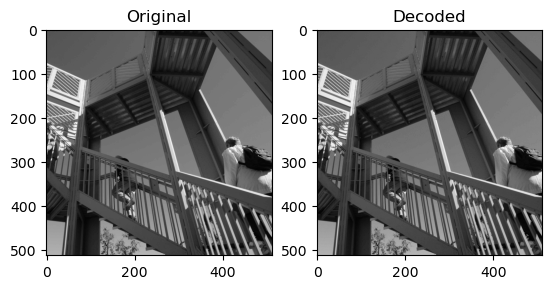

MSE=1.1927947998046875


In [10]:
# Grayscale image to test
grayscale_img = datasets.ascent()

jpeg_compressed_grayscale = encoder.encode(grayscale_img)
jpeg_decompressed_grayscale = decoder.decode(jpeg_compressed_grayscale)

plt.subplot(121).imshow(grayscale_img, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(jpeg_decompressed_grayscale, cmap=plt.cm.gray)
plt.title("Decoded")
plt.show()
print(f"MSE={get_mse(grayscale_img, jpeg_decompressed_grayscale)}")

Exemplu de rulare pe o poza color. Observam 2<MSE<3.

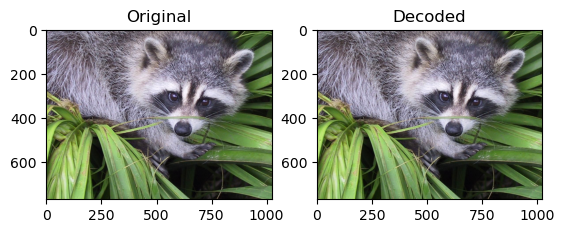

MSE=2.4898656209309897


In [11]:
# RGB image to test
rgb_img = datasets.face()

jpeg_compressed_rgb = encoder.encode(rgb_img)
jpeg_decompressed_rgb = decoder.decode(jpeg_compressed_rgb)

plt.subplot(121).imshow(rgb_img, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(jpeg_decompressed_rgb, cmap=plt.cm.gray)
plt.title("Decoded")
plt.show()
print(f"MSE={get_mse(rgb_img, jpeg_decompressed_rgb)}")

Functie care realizeaza compresia unei imagini in limita MSE impus de utilizator.<br>
Incercam eliminarea frecventelor inalte fara a depasi limita MSE. 

In [12]:
def compress_within_mse(img, mse):
    encoder, decoder = JpegEncoder(), JpegDecoder()
    compressed, c_mse, c_factor = None, None, 0

    # compress as much as possible, while <mse
    for i in range(0, 16):
        jpeg_compressed = encoder.encode(img, compression_factor=i)
        jpeg_decompressed = decoder.decode(jpeg_compressed)

        current_mse = get_mse(img, jpeg_decompressed)
        if current_mse > mse:
            break

        compressed, c_mse, c_factor = jpeg_compressed, current_mse, i

    if compressed is None:
        raise RuntimeError(f"Could not encode with a MSE smaller than {mse}")

    # gauge compression by the number of zeros
    cnt_zeros = 0
    for seq in compressed.flatten():
        cnt_zeros += sum(
            [runlength for (runlength, _) in seq.iss]
        )  # zeroes before non-zero amplitudes

        cnt_zeros += 64 - sum(
            [runlength + 1 for (runlength, _) in seq.iss]
        )  # trailing zeroes

    print(
        f"Achieved MSE={c_mse} with compression factor {c_factor}, 0-percentage: {cnt_zeros / (img.shape[0] * img.shape[1] * img.shape[2])}"
    )

    return compressed


Exemplu de compresie a unei imagini color in limita MSE<=50.

Achieved MSE=43.79622141520182 with compression factor 10, 0-percentage: 0.875626458062066


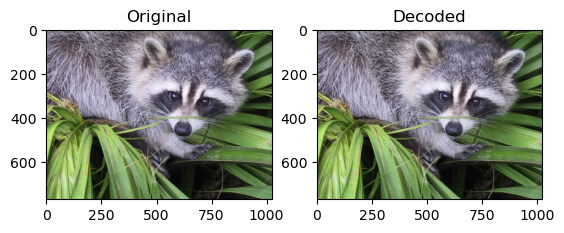

In [13]:
rgb_compressed_within_50 = compress_within_mse(rgb_img, 50)
decompressed_50 = decoder.decode(rgb_compressed_within_50)
plt.subplot(121).imshow(rgb_img, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(decompressed_50, cmap=plt.cm.gray)
plt.title("Decoded")
plt.show()

Aceeasi imagine, cu o compresie mai inalta (limita MSE<=1000).

Achieved MSE=438.4710790846083 with compression factor 14, 0-percentage: 0.984375


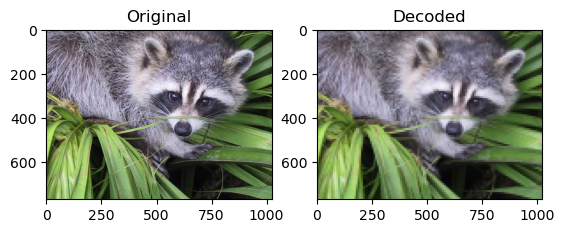

In [14]:
rgb_compressed_within_1000 = compress_within_mse(rgb_img, 1000)
decompressed_1000 = decoder.decode(rgb_compressed_within_1000)
plt.subplot(121).imshow(rgb_img, cmap=plt.cm.gray)
plt.title("Original")
plt.subplot(122).imshow(decompressed_1000, cmap=plt.cm.gray)
plt.title("Decoded")
plt.show()

Functie care realizeaza compresia unui video, frame cu frame.

In [15]:
def compress_video(video_path, out_path):
    encoder = JpegEncoder()
    decoder = JpegDecoder()

    # process a video frame-by-frame and save it
    # https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html#saving-a-video
    cap = cv.VideoCapture(video_path)

    frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    w = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
    h = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
    print(f"Video has {frame_count} frames")

    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*"mp4v")
    out = cv.VideoWriter(out_path, fourcc, 20.0, (w, h), True)

    while cap.isOpened():
        ret, frame = cap.read()
        if ret == True:
            frame = cv.cvtColor(
                frame, cv.COLOR_BGR2RGB
            )  # opencv reads images in BGR, so we convert to RGB

            compressed = decoder.decode(
                encoder.encode(frame, compression_factor=13)
            ).astype(np.uint8)

            compressed = cv.cvtColor(
                compressed, cv.COLOR_RGB2BGR
            )  # convert back to BGR

            # write the compressed frame
            out.write(compressed)
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()


Un exemplu de compresie video se afla in acelasi folder cu notebook-ul.<br>
Varianta compresata a "flower.mp4" este "compressed.mp4".<br>
Pentru a reproduce (dureaza ~20 minute): <code>compress_video("flower.mp4", "compressed.mp4")</code>